# <center> <h1> Análisis de mercado inmobiliario</h1> </center>
 # <center> <h1>Podemos estimar el valor de una vivienda</h1> </center>

**********  

El trabajo consiste en desarrollar un algoritmo con el que podamos predecir si el valor de una propiedad segun una seria de variables caracteristicas de una vivienda bajo la implementacion de dos modelos de ML.

por: Leonardo Gonzalez J.

# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



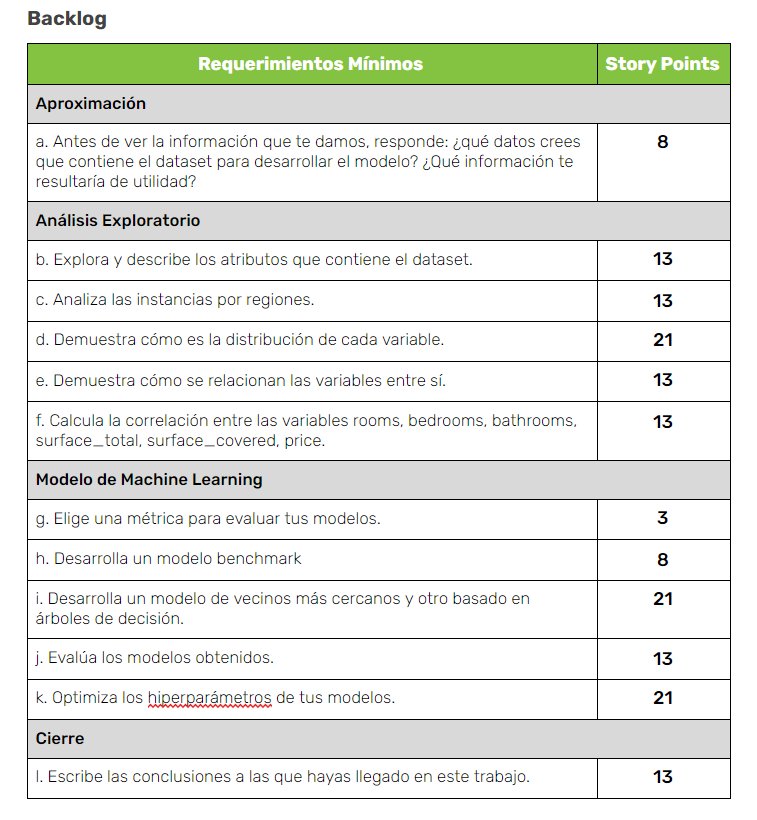

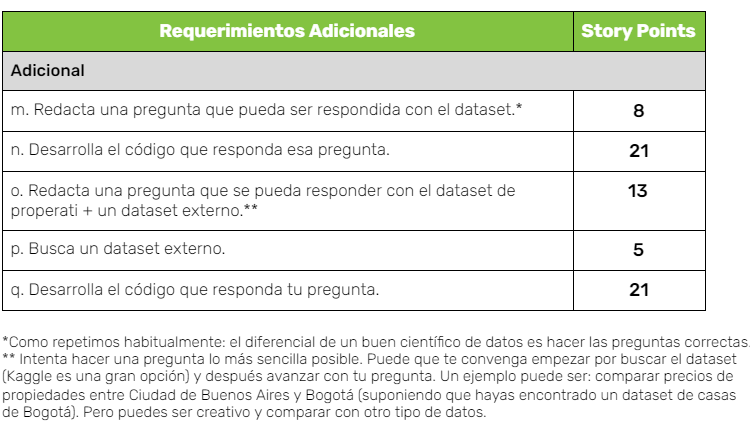

# a.

**RESPUESTA**

Los Datos que entreguen caracteristicas de la vivienda como m2, materiales, cantidad de habitaciones. Como tambien datos del entorno como el barrio, zona urbana. Tambien datos que nos permitan tener alguna idea del precio por metro cuadraro que se este ofertando por viviendas de cierta carteristicas, en el caso que no contemos con precios.

Estos datos son necesarios para poder tener al menos un relacion entre el precio de un inmuble y las caracteristicas que lo componen, considerando que el mercado inmobiliario ya cuenta con ciertos parametros que nos pueden ayudar entender esta relacion.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#importamos algunas librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

#scipy nos ayuda con algunos estadisticos
import scipy as sp
from scipy import stats

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

# Analisis Exploratori de datos.

# b.

In [2]:
df = pd.read_csv(r'DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
#como se componen los datos
df.shape

(146660, 19)

In [4]:
#como se componen los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

<p style="color:red;">Observamos que el Dataset tiene 146.660 lineas y 19 columnas, con datos faltantes en algunas variables</p>

In [5]:
#una mirada a los datos nulos
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

<AxesSubplot:>

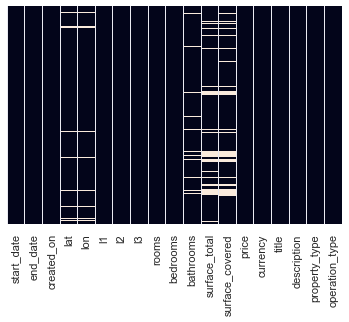

In [62]:
#sabemos que tenemos datos nulos pero como podemos tener una representacion grafica de ellos.
col_prop = ["property_type","price","surface_covered","surface_total","rooms","bedrooms","bathrooms"]
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<p style="color:red;">Observamos que los datos faltantes en variables como superficie total y cubierta con mayor cantidad.</p>

In [6]:
df.describe().round(0)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.0,136701.0,146660.0,146660.0,140703.0,126133.0,125046.0,146660.0
mean,-35.0,-58.0,3.0,2.0,2.0,217.0,113.0,241221.0
std,0.0,0.0,1.0,1.0,1.0,2038.0,917.0,318519.0
min,-35.0,-180.0,1.0,0.0,1.0,10.0,1.0,5500.0
25%,-35.0,-59.0,2.0,1.0,1.0,52.0,47.0,111000.0
50%,-35.0,-58.0,3.0,2.0,1.0,78.0,68.0,166000.0
75%,-35.0,-58.0,4.0,3.0,2.0,140.0,108.0,265000.0
max,85.0,-58.0,35.0,15.0,14.0,193549.0,126062.0,32434232.0


3. **Tipos de propiedad**: 
¿Cuántos tipos de propiedad hay publicados según este dataset?
¿Cuántos instancias por cada tipo de propiedad hay en el dataset? 

Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. 
**Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
#podemos tener una primera vista del tipo de propiedades
df['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [6]:
#podemos saber cuantas hay de cada tipo utilizando una tabla
df.groupby(['property_type'])['property_type'].agg('count').sort_values(ascending=False)

property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

<AxesSubplot:xlabel='property_type'>

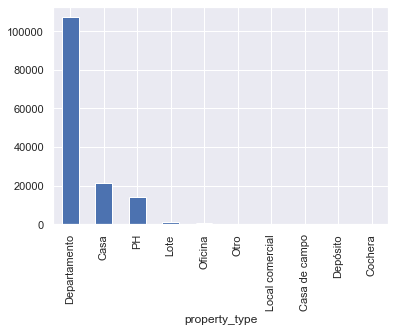

In [7]:
#Podemos combinar la tabla con un grafico y ordenarlo de mayor a menor
df.groupby(['property_type'])['property_type'].agg('count').sort_values(ascending=False).plot(kind='bar')

<p style="color:red;">De un total de 146.660 datos de vivienddas podemos observar que mayoria corresponde a departamentos con 107.326 unidades seguido de casa y PH.</p>

# c.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<AxesSubplot:>

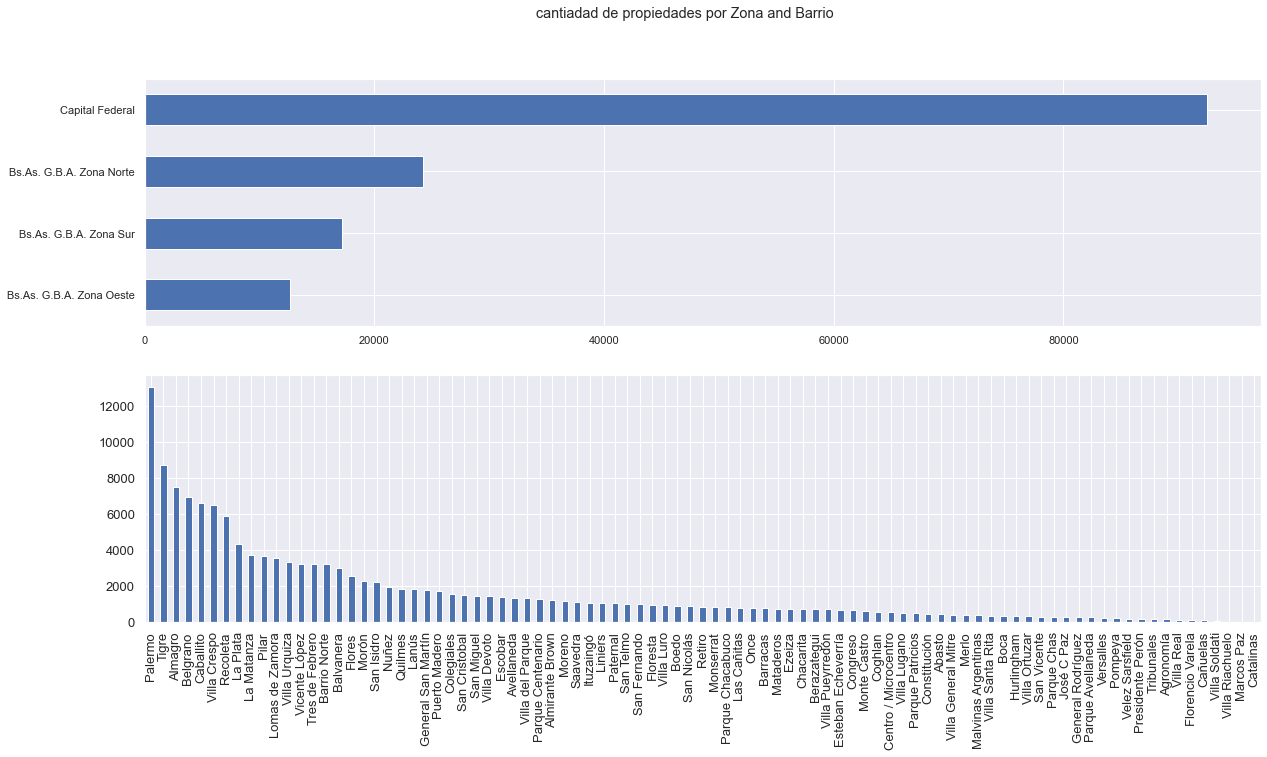

In [10]:
#Podemos utilizar subplot para mostrar ambos graficos juntos y configurar sus estilo en gerenal y por cada uno
fig, axarr = plt.subplots(2,1,figsize=(20, 10))
fig.suptitle('cantiadad de propiedades por Zona and Barrio')

df['l2'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[0]
)
df['l3'].value_counts().plot.bar(
    ax=axarr[1],fontsize= 13
)


In [273]:
df['l2'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste'],
      dtype=object)

<p style="color:red;"> Cuando observamos los datos por ubicacion podemos destacar que corresponden mayormente a Capital Federal en las provincias de Palermo, tigre, almargro entre otras.  </p>

## Como se distribuyen las propiedades por zona y localida

<AxesSubplot:>

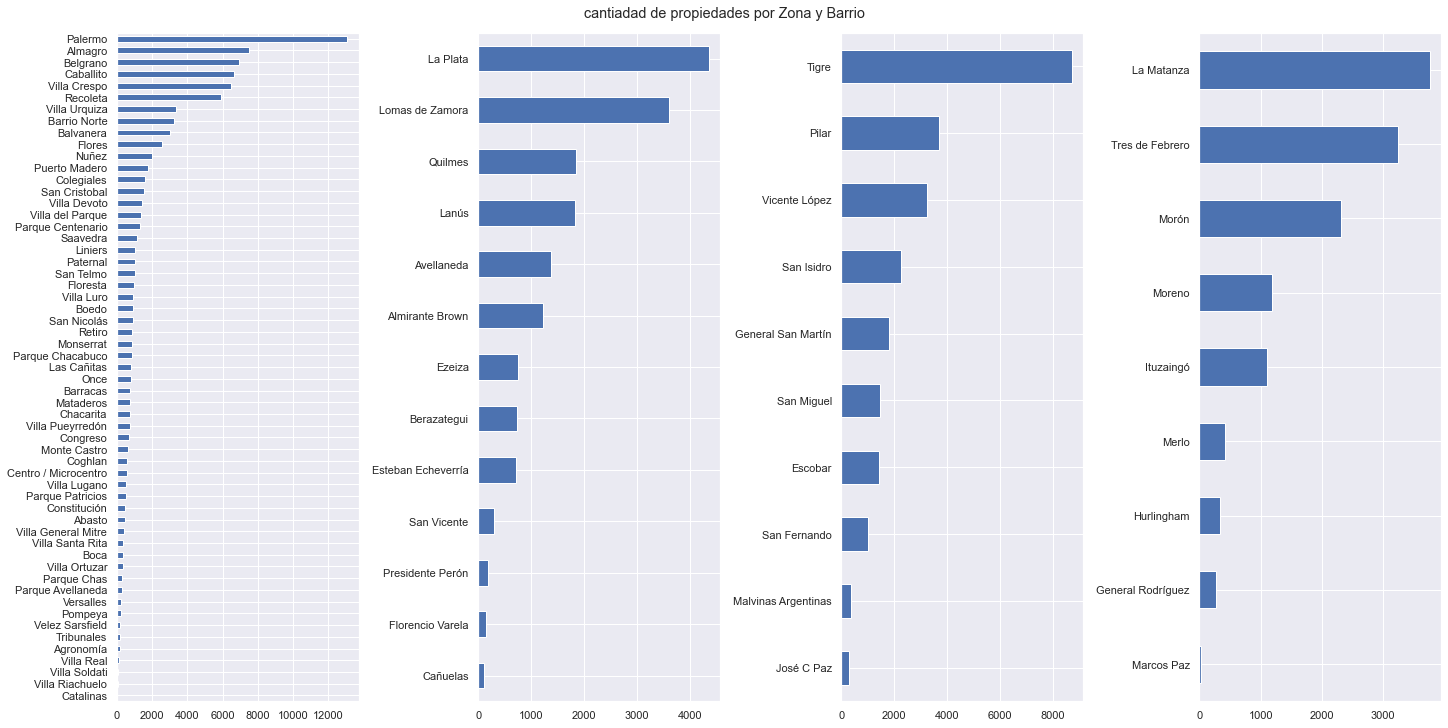

In [48]:
fig, axarr = plt.subplots(1,4,figsize=(20, 10),constrained_layout= True)
fig.suptitle('cantiadad de propiedades por Zona y Barrio')

df[df['l2']=='Capital Federal']['l3'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[0])
df[df['l2']=='Bs.As. G.B.A. Zona Sur']['l3'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[1])
df[df['l2']=='Bs.As. G.B.A. Zona Norte']['l3'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[2])
df[df['l2']=='Bs.As. G.B.A. Zona Oeste']['l3'].value_counts().sort_values(ascending= True).plot.barh(
    ax=axarr[3])


<p style="color:red;"> Podemos destacar que Capital Federal tiene una distribucion mayor en comparacion de otras zonas, ademas manttiene los precios mas elevados  </p>

<AxesSubplot:xlabel='price', ylabel='l3'>

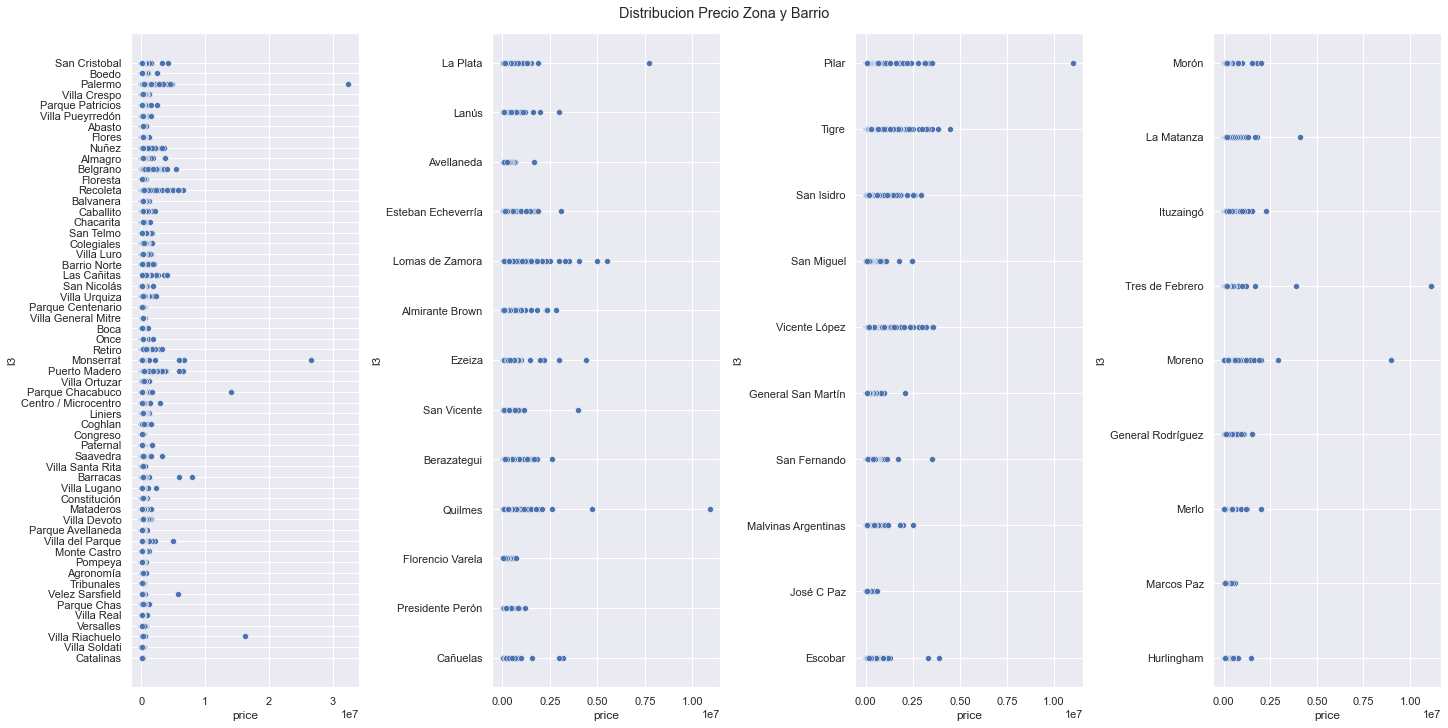

In [55]:
fig, axarr = plt.subplots(1,4,figsize=(20, 10),constrained_layout= True)
fig.suptitle('Distribucion Precio Zona y Barrio')

sns.scatterplot(data=df[df['l2']=='Capital Federal'],x="price",y='l3', ax=axarr[0])
sns.scatterplot(data=df[df['l2']=='Bs.As. G.B.A. Zona Sur'],x="price",y='l3', ax=axarr[1])
sns.scatterplot(data=df[df['l2']=='Bs.As. G.B.A. Zona Norte'],x="price",y='l3', ax=axarr[2])
sns.scatterplot(data=df[df['l2']=='Bs.As. G.B.A. Zona Oeste'],x="price",y='l3', ax=axarr[3])

<p style="color:red;"> En cuanto a la distribucion de precios por zona y barrio podemos destacar que la alta cantidad de outliers dificualta una lectura precisa </p>

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [64]:
df_cf = df[df.property_type.isin(['Departamento','Casa','PH']) & df.l2.isin(['Capital Federal'])]
df_cf.shape

(91485, 19)

# d.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

<Figure size 432x288 with 0 Axes>

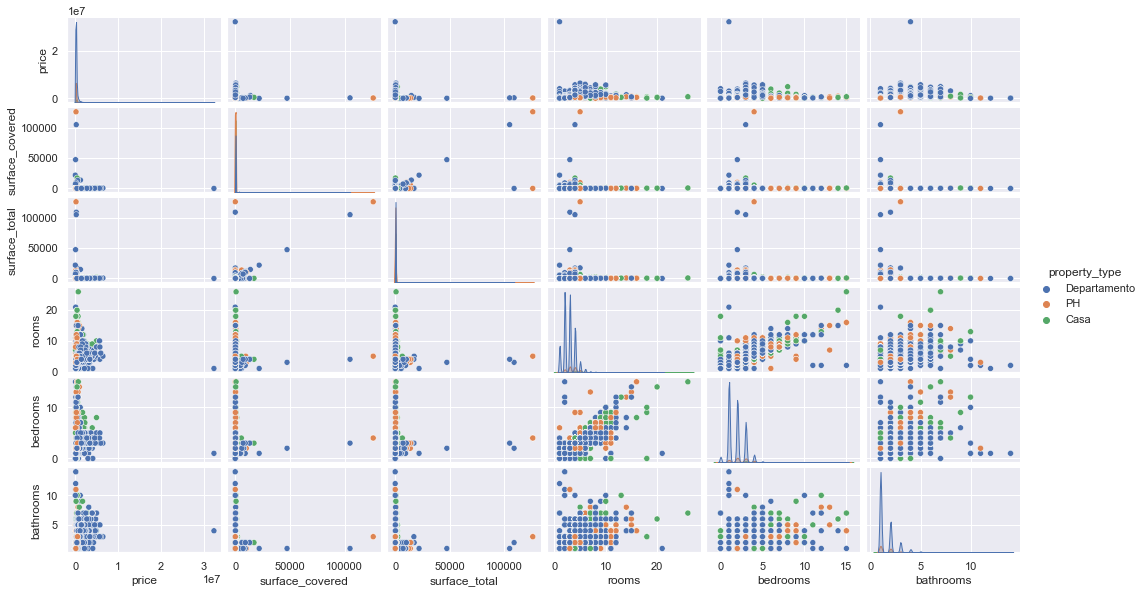

In [12]:
#podemos estudiar la relacion de las variables un pairplot de sns
#creamos una figura
figz= plt.figure()
#agrupamos las variables que deseamos estudiar.
col_prop = ["property_type","price","surface_covered","surface_total","rooms","bedrooms","bathrooms"]
#Sesmentamos por tipo de propiedad con colores hue=
graph=sns.pairplot(df_cf[col_prop],hue="property_type")
#damos tamaño a la figura
graph.fig.set_size_inches(16,8)
plt.show()

<p style="color:red;">Podemos observar que este grupo de datos tiene una serie outlayers que interfieren con el analisis.
    Debemos realizar algunas correcciones para poder tener informacion un tanto mas limpia que nos ayude con el analisis.</p>



# e.
<h1>Explorando y Regularizando datos</h1>

In [65]:
#tenemos los datos filtrados de Departamentos, PH y Casas de Capital Feredal.
#creamos una copia de la ultima data
df_cf2 = df_cf.copy() 
#ordenamos el idex por el nombre
#Creamos un columna de precios en Miles
df_cf2['price_m']= df_cf2['price']/1000
df_cf2 = df_cf2.reindex(sorted(df_cf2.columns), axis=1) 

<AxesSubplot:xlabel='rooms', ylabel='Count'>

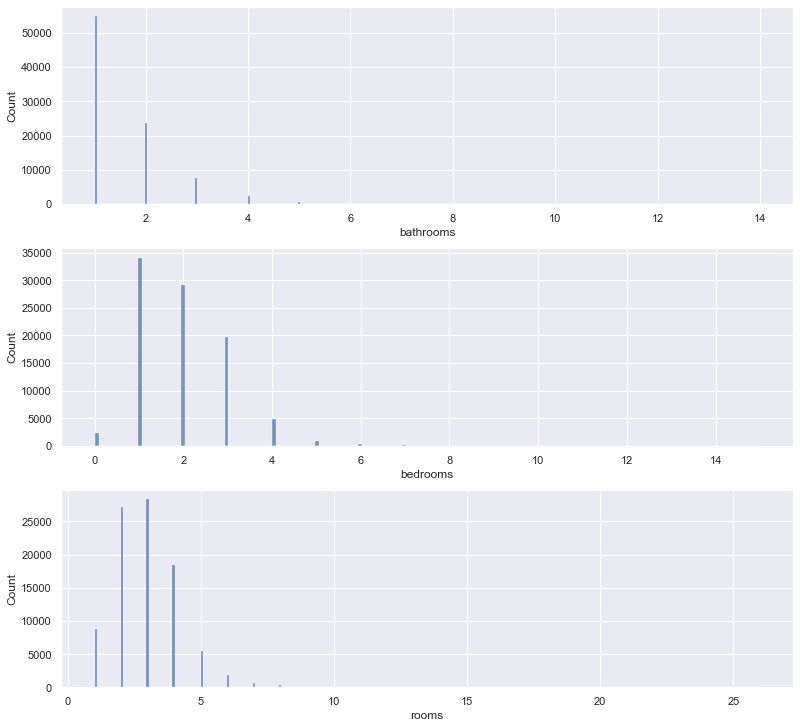

In [68]:
#podemos ver la distribucion de las habitaciones
fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(11,10),constrained_layout= True)
sns.histplot(data=df_cf2,x="bathrooms", ax=ax1)
sns.histplot(data=df_cf2,x="bedrooms", ax=ax2)
sns.histplot(data=df_cf2,x="rooms", ax=ax3)

<p style="color:red;"> Notamos que existen datos que no son relevantes, una descripcion inicial de los datos nos indica que existe outlaiers que debemos corregir </p>

## Revisemos como se distribeyen los datos de las diferentes Rooms

In [15]:
#para poder determinar si elimanremos datos podemos ver su distribucion.
df = pd.DataFrame()
#remplaza la variable a revisar.
var_exp = df_cf2["bathrooms"] #["bathrooms"]/["bedrooms"]/["rooms"]
#Revisa la distribucion de los datos para saber que hacer con los outlayers
df['total'] = var_exp.value_counts()
df['pond'] = (var_exp.value_counts()/var_exp.value_counts().sum()).round(3)
df['cumsum'] = df['pond'].cumsum()
df.sort_values(by= 'pond' ,ascending= False)
#Luego de revisar 

,total,pond,cumsum
1.0,54801,0.614,0.614
2.0,23573,0.264,0.878
3.0,7645,0.086,0.964
4.0,2365,0.026,0.990
5.0,714,0.008,0.998
6.0,154,0.002,1.000
7.0,39,0.000,1.000
10.0,7,0.000,1.000
9.0,5,0.000,1.000
8.0,4,0.000,1.000


In [16]:
#para poder determinar si elimanremos datos podemos ver su distribucion.
df = pd.DataFrame()
#remplaza la variable a revisar.
var_exp = df_cf2["rooms"] #["bathrooms"]/["bedrooms"]/["rooms"]
#Revisa la distribucion de los datos para saber que hacer con los outlayers
df['total'] = var_exp.value_counts()
df['pond'] = (var_exp.value_counts()/var_exp.value_counts().sum()).round(3)
df['cumsum'] = df['pond'].cumsum()
df.sort_values(by= 'pond' ,ascending= False)
#Luego de revisar 

,total,pond,cumsum
3.0,28327,0.310,0.310
2.0,27249,0.298,0.608
4.0,18414,0.201,0.809
1.0,8842,0.097,0.906
5.0,5461,0.060,0.966
6.0,1824,0.020,0.986
7.0,710,0.008,0.994
8.0,405,0.004,0.998
9.0,80,0.001,0.999
10.0,80,0.001,1.000


## Analisis 
Podemos observar que 

- bathroom mayores a 6 son irrelevantes.
- room y bedrooms mayores a 7 son irrelevantes.

Debemos trabajar los datos Outliers


# Outliers

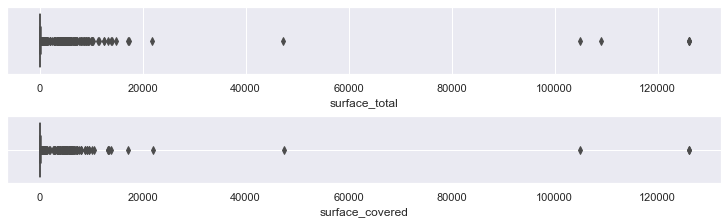

In [17]:
#Una miarada a la superficies.
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,3),constrained_layout= True)
sns.boxplot(data=df_cf2,x="surface_total", ax=ax1)
sns.boxplot(data=df_cf2,x="surface_covered", ax=ax2)
plt.grid()
plt.show()

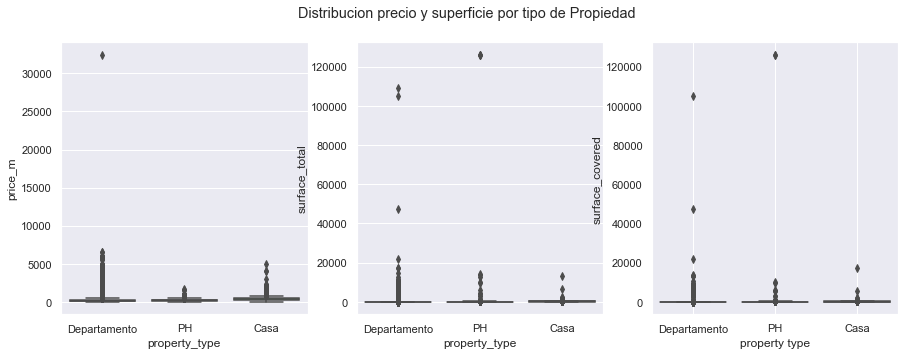

In [18]:
#revisando la distribucion de las propiedad segun precio y superficie
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Distribucion precio y superficie por tipo de Propiedad')
sns.boxplot(data=df_cf2, x='property_type', y='price_m',ax=ax1)
sns.boxplot(data=df_cf2, x='property_type', y='surface_total',ax=ax2)
sns.boxplot(data=df_cf2, x='property_type', y='surface_covered',ax=ax3)
plt.xlabel ( 'property type' ) 
plt.grid()
plt.show()

<p style="color:red;">Podemos deducir que los las propiedas con superficies mayores a 20.000 son outliers </p>


In [20]:
mono_room = df_cf[(df_cf["bedrooms"] == 0) & (df_cf["rooms"] == 1)]
mono_room.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
597,2019-04-25,2019-06-18,2019-04-25,-34.572944,-58.456753,Argentina,Capital Federal,Belgrano,1.0,0.0,1.0,49.0,42.0,142000.0,USD,DEPARTAMENTO EN VENTA,Xintel (NVS-NVS-246) Alquiler temporario de De...,Departamento,Venta
604,2019-04-25,2019-05-03,2019-04-25,-34.618575,-58.499664,Argentina,Capital Federal,Monte Castro,1.0,0.0,1.0,34.0,31.0,79000.0,USD,DEPARTAMENTO EN VENTA,Xintel (ANT-ANT-287) Venta de Departamento MON...,Departamento,Venta
609,2019-04-25,2019-05-03,2019-04-25,-34.618575,-58.499664,Argentina,Capital Federal,Villa Devoto,1.0,0.0,1.0,34.0,31.0,79000.0,USD,DEPARTAMENTO EN VENTA,Xintel (ANT-ANT-286) Venta de Departamento MON...,Departamento,Venta
610,2019-04-25,2019-07-10,2019-04-25,-34.621188,-58.379921,Argentina,Capital Federal,Constitución,1.0,0.0,1.0,32.0,30.0,85000.0,USD,DEPARTAMENTO EN VENTA,Xintel (ICO-ICO-2390) Venta de Departamento MO...,Departamento,Venta
611,2019-04-25,2019-07-10,2019-04-25,-34.580294,-58.489623,Argentina,Capital Federal,Villa Urquiza,1.0,0.0,1.0,30.0,27.0,100000.0,USD,DEPARTAMENTO EN VENTA,Xintel (CRE-CRE-5771) <p> Departamento de 1 am...,Departamento,Venta


In [21]:
#remplazamos los valor de 0 por 1 considerando que si tiene un habitacion.
df_cf2['bedrooms'].replace([0],[1],inplace=True)

In [22]:
#rivisamos que los cambios esten 
df_cf2[(df_cf2["bedrooms"] == 0) & (df_cf2["rooms"] == 1)].head()

,bathrooms,bedrooms,created_on,currency,description,end_date,l1,l2,l3,lat,lon,operation_type,price,price_m,property_type,rooms,start_date,surface_covered,surface_total,title


Podemos observar que aquellas propiedades con 0 beedrooms son iquivalentes a un mono-ambiente.

# Limpiando datos outliers

Para un correcto analisis y posterios aplicacion de modelos predictivo es necesario establecer algunos limites a los datos de tal manera asegurar que estos no cuenta con valores que puedan iterferir con los resutados.

Anteriormente se definio los limites de las bariables habitacionales y de superficie asi mismo se determinanara los limites de precio para cada tipo de propiedad.

<h3>Para este caso utilizaremos IQR para eliminar datos por presentar mejor rendiemitno que Z-score</h3>




In [23]:
#definimos los valores  unicos para cada propiedad
propiedades= df_cf2['property_type'].unique()

In [24]:
#Podemos utilizar una funcion que nos ayude a calcular los cuartiles que luego podemos utilizar para limitar los valores.
for x in propiedades:
    Q1=df_cf2[df_cf2['property_type']==x]['surface_total'].quantile(0.25)
    Q3=df_cf2[df_cf2['property_type']==x]['surface_total'].quantile(0.75)
    IQR= Q3-Q1
    surface_min = df_cf2[df_cf2["property_type"]==x]["surface_total"].quantile(0.01) #evitar valores negativos
    surface_max = Q3 + (IQR*1.5)
    print(x)
    print('Superficie maxima {}'.format(surface_max))
    print('Superficie minima {}'.format(surface_min))
    print('IQR {}'.format(IQR))
    print('-------------')
 #este metodo lo puede reutulizar para el resto de variables

Departamento
Superficie maxima 177.0
Superficie minima 25.0
IQR 52.0
-------------
PH
Superficie maxima 275.0
Superficie minima 35.0
IQR 82.0
-------------
Casa
Superficie maxima 579.0
Superficie minima 56.0
IQR 166.0
-------------



<p style="color:red;"> Para eliminar los outliers es preferible crear una copia del df para seguir trabajando. </p>

<h2>DF3</h2>
<h1>Eliminado Columnas</h1>

In [25]:
#Recuerda que estamos trabajando con las propiedades de la CF de BA en formato Depto Casa y PH.
df_cf3 = df_cf2.copy()
#aprpovecharemos de elimar la columna precio dado que tenemos Precio_m (precio en miles)
df_cf3.drop(['price'], axis=1, inplace=True)
df_cf3.describe()

,bathrooms,bedrooms,lat,lon,price_m,rooms,surface_covered,surface_total
count,89314.000000,91485.000000,86951.000000,86937.000000,91485.000000,91485.000000,82250.000000,82568.000000
mean,1.560147,1.984511,-34.599081,-58.436002,259.500258,2.964278,94.966310,112.626369
std,0.860309,1.039159,0.023957,0.036297,322.265441,1.314704,778.515243,980.713664
min,1.000000,1.000000,-34.696419,-58.530468,6.000000,1.000000,1.000000,10.000000
25%,1.000000,1.000000,-34.613757,-58.459605,120.000000,2.000000,44.000000,49.000000
50%,1.000000,2.000000,-34.599446,-58.433789,175.000000,3.000000,63.000000,71.000000
75%,2.000000,3.000000,-34.584148,-58.410143,279.000000,4.000000,96.000000,111.000000
max,14.000000,15.000000,-34.535818,-58.353930,32434.232000,26.000000,126062.000000,126062.000000


In [26]:
#copiamos la data
df_cf4 = df_cf3.copy()
#definimos los cuantiles
Q1= df_cf4.quantile(0.25)
Q3= df_cf4.quantile(0.75)
IQR = Q3-Q1
#aplicamos a todas las columnas del df
df_cf4=df_cf3[~((df_cf3<(Q1-1.5*IQR))|(df_cf3>(Q3+1.5*IQR))).any(axis=1)]
df_cf4.describe().round(3)

,bathrooms,bedrooms,lat,lon,price_m,rooms,surface_covered,surface_total
count,77205.000,79211.000,75748.000,75737.000,79211.000,79211.000,70721.000,70988.000
mean,1.360,1.784,-34.599,-58.437,185.623,2.701,64.509,73.156
std,0.578,0.842,0.023,0.035,93.229,1.032,29.230,35.061
min,1.000,1.000,-34.658,-58.530,7.500,1.000,1.000,10.000
25%,1.000,1.000,-34.614,-58.460,115.000,2.000,42.000,47.000
50%,1.000,2.000,-34.600,-58.434,160.000,3.000,57.000,65.000
75%,2.000,2.000,-34.586,-58.412,235.000,3.000,80.000,90.000
max,3.000,6.000,-34.540,-58.354,517.266,7.000,174.000,204.000


<AxesSubplot:xlabel='surface_covered'>

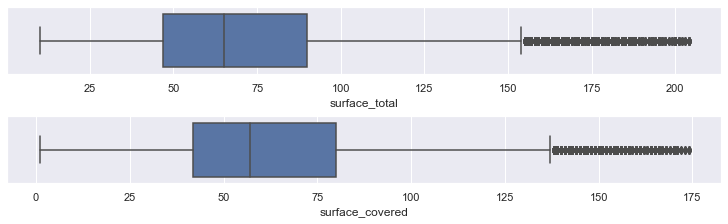

In [27]:
#Una miarada a la superficies expones datos mas nomarlizados
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,3),constrained_layout= True)
sns.boxplot(data=df_cf4,x="surface_total", ax=ax1)
sns.boxplot(data=df_cf4,x="surface_covered", ax=ax2)

<p style="color:red;"> Podemos observar que el 75% de los las propiedades no superta una superficie total de 90 con un maximo de 204 y el 75% de las propiedades no superra una superficie cubierta de 80 con un maximo de 174</p>

Text(0.5, 0, 'property type')

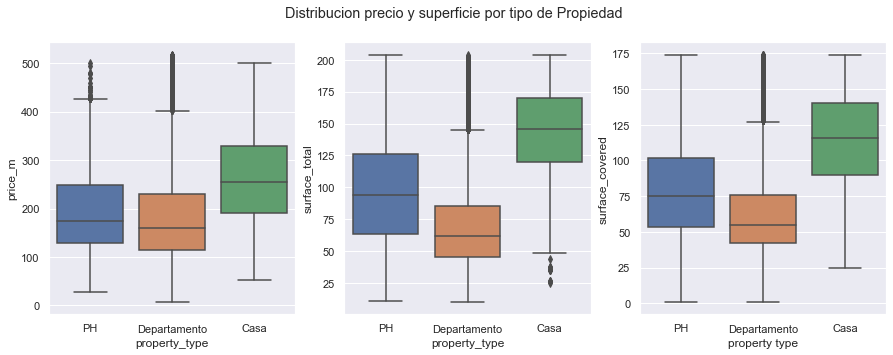

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Distribucion precio y superficie por tipo de Propiedad')
sns.boxplot(data=df_cf4, x='property_type', y='price_m',ax=ax1)
sns.boxplot(data=df_cf4, x='property_type', y='surface_total',ax=ax2)
sns.boxplot(data=df_cf4, x='property_type', y='surface_covered',ax=ax3)
plt.xlabel ( 'property type' ) 

<h2> Observaciones</h2>

Luego de normalizar los datos podemos ver una mejor distribucion de ellos
   
   Sabemos que tenemos una mayor catidad de departamentos al a venta
   
   PH mantiene precios similares al Departamentos sin embargo PH tiene una mayor superficie
   
   La superficie de las propiedades totales y cubiertas deberias ser similares, seria bueno revisar estas variables



<AxesSubplot:xlabel='surface_total', ylabel='surface_covered'>

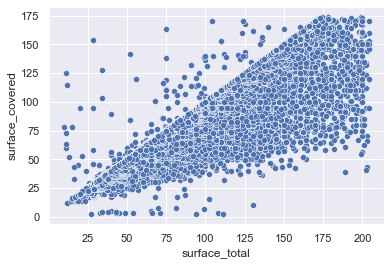

In [29]:
#existen casos donde la superficie cubierta es mayo que la superficie total. 
sns.scatterplot(data=df_cf4, x='surface_total', y='surface_covered')

<p style="color:red;"> Algunas propiedades mantiene una superficie cubierta mayor a la superficie total lo que podemos mejorar con alguna impuetaciones</p>

In [30]:
df_cf4[(df_cf4["surface_total"]) < (df_cf4["surface_covered"])].shape

(557, 19)

<h3>DF5</h3>
Limpiando la superficie

In [31]:
#creamos una copia
df_cf5 = df_cf4.copy()

In [32]:
#podemos eliminarlas o remplazarlar estos datos, esta caso considerando su tamaño los elimanremos
df_cf5.drop(df_cf5.loc[df_cf5['surface_covered'] > df_cf5['surface_total']].index, inplace=True ,axis=0)

<AxesSubplot:xlabel='surface_total', ylabel='surface_covered'>

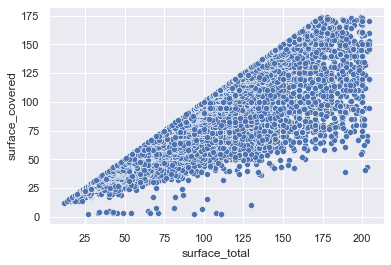

In [33]:
sns.scatterplot(data=df_cf5, x='surface_total', y='surface_covered')

<p style="color:red;"> Aquellos datos que contenian este erro fueron eliminardo para normalizar un tanto los datos</p>

<h2>DF6</h2>

In [34]:
df_cf6 = df_cf5.copy()

<Figure size 432x288 with 0 Axes>

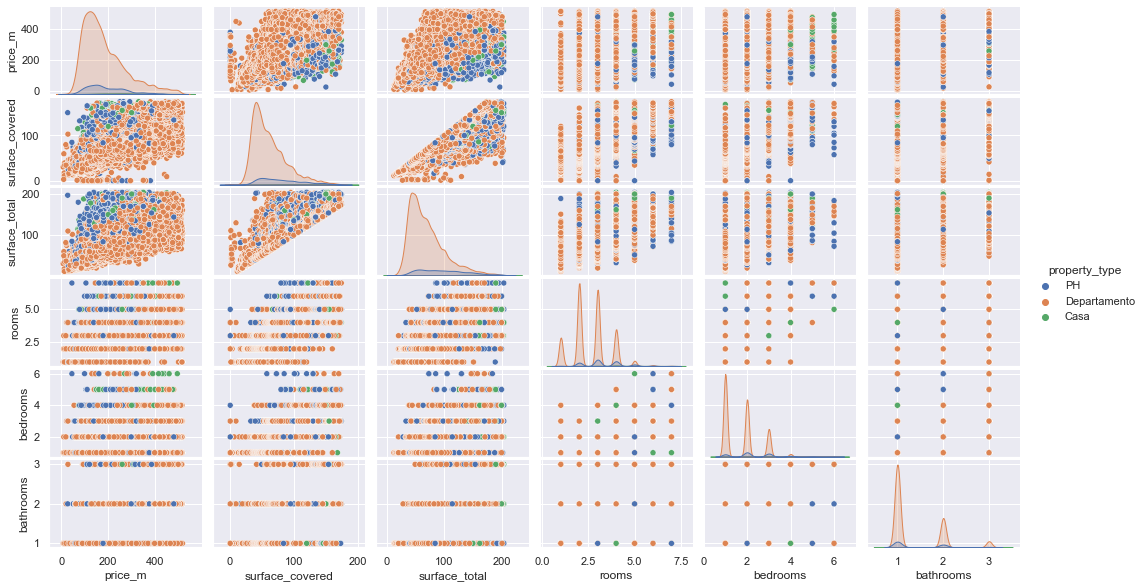

In [35]:
figz= plt.figure()
col_prop = ["property_type","price_m","surface_covered","surface_total","rooms","bedrooms","bathrooms"]
graph=sns.pairplot(df_cf6[col_prop],hue="property_type")
graph.fig.set_size_inches(16,8)
plt.show()

<p style="color:red;"> Ahora podemos detectar mejor los segmentos de datos y su relación </p>


# f.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [44]:
#correlacion de variables numericas
df_cf6.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,bathrooms,bedrooms,lat,lon,price_m,rooms,surface_covered,surface_total
bathrooms,1.0000,0.5343,0.0729,0.0044,0.6208,0.5272,0.6195,0.5845
bedrooms,0.5343,1.0000,-0.0291,0.0272,0.5806,0.9315,0.7930,0.7387
lat,0.0729,-0.0291,1.0000,-0.1069,0.2689,-0.0166,-0.0000,-0.0042
lon,0.0044,0.0272,-0.1069,1.0000,0.0619,0.0269,0.0609,-0.0235
price_m,0.6208,0.5806,0.2689,0.0619,1.0000,0.6021,0.7543,0.7329
rooms,0.5272,0.9315,-0.0166,0.0269,0.6021,1.0000,0.8020,0.7534
surface_covered,0.6195,0.7930,-0.0000,0.0609,0.7543,0.8020,1.0000,0.9187
surface_total,0.5845,0.7387,-0.0042,-0.0235,0.7329,0.7534,0.9187,1.0000


## Conclusiones:
Finalmente una apropiada limpieza de los datos nos aproxima aun mas a aquellas variables que posiblemente puedan explicar el valor de una propiedad. En este caso variables como la superficie, la cantaidad de habitaciones o baños es relevante a la hora de establecer el valor de una propiedad Sin embargo estamos dejando fuera por el momento aquellas variables de carter categorico como puede ser el sector que se ubica dentro de la mimsa region. Pero tal vez sea algo que podemas abordar mas adelante.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Palermo es una de las comunas de donde los preios mas costosos muy por sobre el resto, pero que tipo de propiedad predomina en estas zonas ? 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

## Preparando la data

In [3]:
#filtramos los datos
df_propiedades = pd.read_csv(r'DS_Proyecto_01_Datos_Properati.csv')

In [4]:
df_propiedades = df_propiedades[(df_propiedades['l2'] == "Capital Federal")&
                 ((df_propiedades['surface_total'] <= 1000) & (df_propiedades['surface_total'] >= 15)) & 
                 ((df_propiedades['price'] <= 4000000))&               
                 ((df_propiedades['property_type'] == "Departamento") |
                 (df_propiedades['property_type'] == "Casa") |
                 (df_propiedades['property_type'] == "PH"))]
df_propiedades.shape

(82373, 19)

In [5]:
col_df=["surface_total","surface_covered","bathrooms","bedrooms","price","rooms"]

In [6]:
df_propiedades = df_propiedades[col_df]
df_propiedades = df_propiedades.dropna()
df_propiedades.shape

(81019, 6)

##### El dataset ya esta limpio y con los datos solicitados, con esto ya podemos comenzar la aplicacion de modelos.

## Metricas

**Importante:** Utilizaremos las siguientes metricas para la evaluación

Principalmente por que son mas apropiadas en dataset con alta presencia de outliers o dispersiones mayores.

1. Error Absoluto Medio MAE
1. Error Cuadratico Medio RMSE
1. Coef de Determinacion R2

Para este caso considerando el tipo de variable explicativa lo mas apropiado es tratar los datos en base a metricas para modelos de Regresion en variables continuas.


Los hiperparametros estaran dados por defecto inicialmente

In [7]:
#importamos las librerias que utilizaremos para efectos de ML
from sklearn import metrics #metricas
from sklearn.model_selection import train_test_split #testeo
from sklearn.neighbors import KNeighborsRegressor #
from sklearn.metrics import mean_squared_error 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.feature_selection import RFE

from sklearn.svm import SVR
import math

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

# Modelos ML aplicados

In [8]:
#Definimos variables de preuba y testeo
X = df_propiedades[["rooms","surface_covered","surface_total","bedrooms","bathrooms"]]
y = df_propiedades["price"]

In [9]:
#Realizamos un Train/Test split de los datos.
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

**En este caso una regresion lineal simple nos dara una primera aproximacion a la estimacion del valor de una vivienda**

In [10]:
#Generar un modelo benchmark y evaluarlo.
regressor = LinearRegression() #creamos un regresion lineal
regressor.fit(X_train,y_train) #la aplicamos a nuestros datos

#obtenemos los datos 
y_train_pred= regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)


In [11]:
#metricas para modelos de regresion
MAE_train=mean_absolute_error(y_train,y_train_pred)
MAE_test=mean_absolute_error(y_test,y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

print("Error Absoluto Medio train:",MAE_train.round(3))
print("Error Absoluto Medio test:",MAE_test.round(3))
print("-------------------------------------------")
print("El Error Cuadratico Medio train",RMSE_train.round(3))
print("El Error Cuadratico Medio test",RMSE_test.round(3))
print("-------------------------------------------")
print("El r2 train:",r2_train.round(3))
print("El r2 test :",r2_test.round(3))


Error Absoluto Medio train: 96336.777
Error Absoluto Medio test: 97347.379
-------------------------------------------
El Error Cuadratico Medio train 199315.871
El Error Cuadratico Medio test 203269.831
-------------------------------------------
El r2 train: 0.553
El r2 test : 0.547


Considerando que debemos elegir un matrica para la evalucion del modelo, se sugiere utilizar para este caso el error cuadratico medio, considerando que si bien el error es significante es menor al obtenido por el error absoluto medio. Por otro lado las variables seleccionadas para poder explicar el precio de una vivienda son significativas segun el r2.

## Entrenando Arbol y Knn

In [12]:
#llamamos la funcion de regresion y creamos la instancia
arbol_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

#entrenamos el modelo
arbol_regressor.fit(X_train,y_train)
knn_regressor.fit(X_train,y_train)

#Obtenemos los datos
#Arbol Regresor
y_arbol_pred_train = arbol_regressor.predict(X_train)
y_arbol_pred_test = arbol_regressor.predict(X_test)

#Vecinos mas cercanos
y_knn_pred_train = knn_regressor.predict(X_train)
y_knn_pred_test = knn_regressor.predict(X_test)

**DecisionTreeRegressor**

In [13]:
arbol_MAE_train=mean_absolute_error(y_train,y_arbol_pred_train)
arbol_MAE_test=mean_absolute_error(y_test,y_arbol_pred_test)

arbol_RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_pred_train))
arbol_RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_pred_test))

arbol_r2_train= metrics.r2_score(y_train, y_arbol_pred_train)
arbol_r2_test= metrics.r2_score(y_test, y_arbol_pred_test)

print("Error Absoluto Medio train:",arbol_MAE_train.round(3))
print("Error Absoluto Medio test:",arbol_MAE_test.round(3))
print("-------------------------------------------")
print("El Error Cuadratico Medio train",arbol_RMSE_train.round(3))
print("El Error Cuadratico Medio test",arbol_RMSE_test.round(3))
print("-------------------------------------------")
print("El r2 train:",arbol_r2_train.round(3))
print("El r2 test :",arbol_r2_test.round(3))

Error Absoluto Medio train: 23681.868
Error Absoluto Medio test: 49210.559
-------------------------------------------
El Error Cuadratico Medio train 54047.897
El Error Cuadratico Medio test 139248.106
-------------------------------------------
El r2 train: 0.967
El r2 test : 0.787


**KNeighborsRegressor**

In [38]:
knn_MAE_train=mean_absolute_error(y_train,y_knn_pred_train)
knn_MAE_test=mean_absolute_error(y_test,y_knn_pred_test)

knn_RMSE_train=np.sqrt(mean_squared_error(y_train,y_knn_pred_train))
knn_RMSE_test=np.sqrt(mean_squared_error(y_test,y_knn_pred_test))

knn_r2_train= metrics.r2_score(y_train, y_knn_pred_train)
knn_r2_test= metrics.r2_score(y_test, y_knn_pred_test)

print("Error Absoluto Medio train:",knn_MAE_train.round(3))
print("Error Absoluto Medio test:",knn_MAE_test.round(3))
print("-------------------------------------------")
print("El Error Cuadratico Medio train",knn_RMSE_train.round(3))
print("El Error Cuadratico Medio test",knn_RMSE_test.round(3))
print("-------------------------------------------")
print("El r2 train:",knn_r2_train.round(3))
print("El r2 test :",knn_r2_test.round(3))

Error Absoluto Medio train: 50377.791
Error Absoluto Medio test: 60176.677
-------------------------------------------
El Error Cuadratico Medio train 120559.334
El Error Cuadratico Medio test 152972.612
-------------------------------------------
El r2 train: 0.837
El r2 test : 0.743


## Evaluando los resultados y graficando Benchmark

Modelo: Regresión lineal
Error Absoluto Medio test: 97347.379


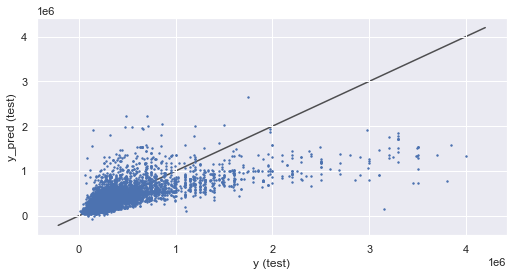

Modelo: Árbol de Decisión
Error Absoluto Medio test: 49210.559


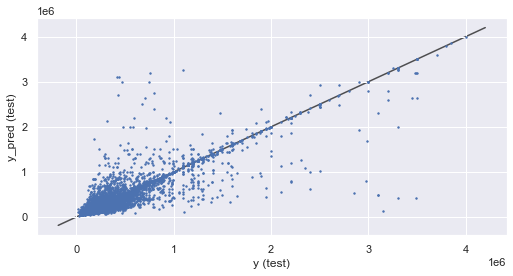

Modelo: Vecinos más cercanos
Error Absoluto Medio test: 60176.677


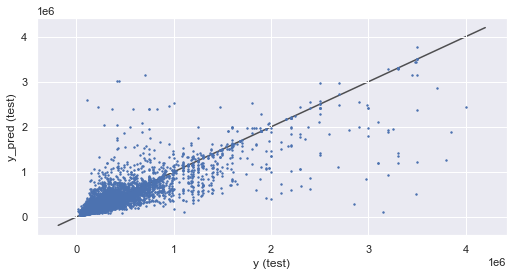

In [231]:
#definimos los modelos a comprar
models = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

#definimos la funcion.
for i, model in enumerate([regressor, arbol_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')

    MAE_test=mean_absolute_error(y_test,y_test_pred)

    print("Error Absoluto Medio test:",MAE_test.round(3))
   
   
    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    

Podemos destacar que un modelo de arbol de Decisión es mas apropiado para la estimacion del valor de una vivienda. Sin embargo es importante mencionar que este tipo de metricas esta determinada fuertemente por la cantidad de datos outliers que el data contenga.

## Optimazando hiperparametros

### Profundidad del arbol

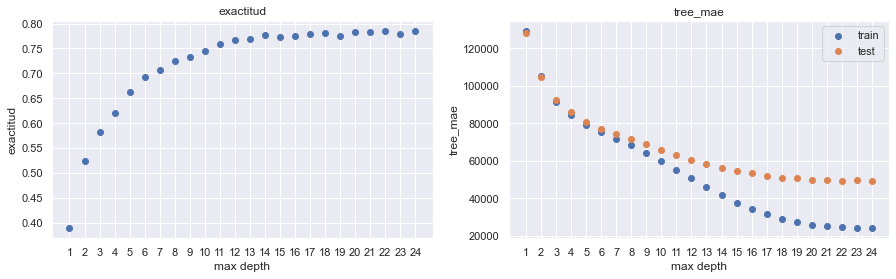

In [41]:
#evaluando la profundidad del arbol
MAX_DEPTH_range = range(1, 25)
scores = []
arbol_mae_train_pred=[]
arbol_mae_test_pred=[]

for k in MAX_DEPTH_range:
    arbol_regressor = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regressor.fit(X_train, y_train)
    scores.append(arbol_regressor.score(X_test, y_test))
    
    y_train_pred = arbol_regressor.predict(X_train)
    
    arbol_mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    arbol_mae_train_pred.append(arbol_mae_train)
    
    y_test_pred = arbol_regressor.predict(X_test)
    
    arbol_mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    arbol_mae_test_pred.append(arbol_mae_test)

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(MAX_DEPTH_range,scores)
ax2.scatter(MAX_DEPTH_range,arbol_mae_train_pred,label="train")
ax2.scatter(MAX_DEPTH_range,arbol_mae_test_pred,label="test")

ax1.set_xticks(MAX_DEPTH_range)
ax2.set_xticks(MAX_DEPTH_range)

ax2.legend()

ax1.set_title('exactitud')
ax1.set_xlabel('max depth')
ax1.set_ylabel('exactitud')

ax2.set_title('tree_mae')
ax2.set_xlabel('max depth')
ax2.set_ylabel('tree_mae')

plt.show()

### Cercania de los vecinos

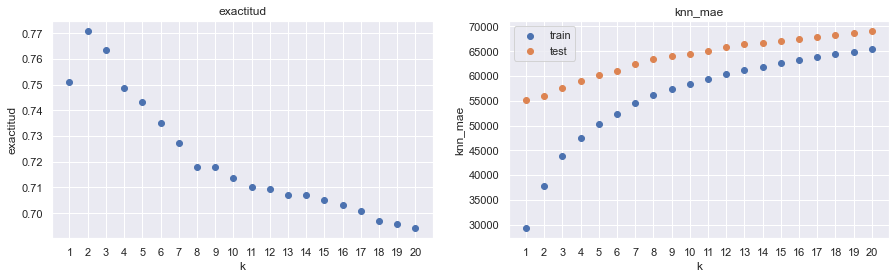

In [40]:
k_range = range(1, 21)
scores = []
knn_mae_train_pred=[]
knn_mae_test_pred=[]
for k in k_range:
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train, y_train)
    scores.append(knn_regressor.score(X_test, y_test))
    
    y_train_pred = knn_regressor.predict(X_train)
    
    knn_mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
    knn_mae_train_pred.append(knn_mae_train)
    
    y_test_pred = knn_regressor.predict(X_test)
    
    knn_mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
    knn_mae_test_pred.append(knn_mae_test)    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(k_range,scores,marker="o")
ax2.scatter(k_range,knn_mae_train_pred,marker="o",label="train")
ax2.scatter(k_range,knn_mae_test_pred,marker="o",label="test")

ax1.set_xticks(k_range)
ax2.set_xticks(k_range)


ax2.legend()


ax1.set_title('exactitud')
ax1.set_xlabel('k')
ax1.set_ylabel('exactitud')

ax2.set_title('knn_mae')
ax2.set_xlabel('k')
ax2.set_ylabel('knn_mae')

plt.show()

### Una vez evaluado los hiperparametros podemos determinar que la profundidad del arbol en 20 y para los vecinos un valor de 3 es mas optimo.

In [60]:
arbol_optimo = DecisionTreeRegressor(max_depth=20,random_state=42)
arbol_optimo.fit(X_train, y_train)

knn_optimo = KNeighborsRegressor (n_neighbors=3)
knn_optimo.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Árbol de Decisión
mae_train: 50043.0


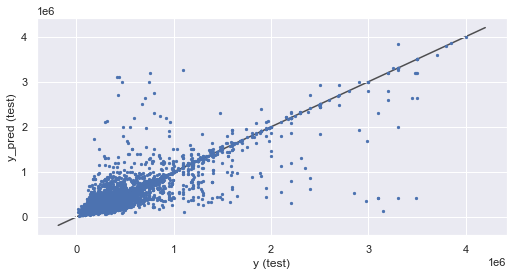

Modelo: Vecinos más cercanos
mae_train: 57620.0


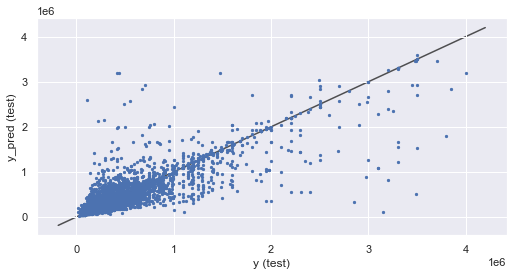

In [61]:
models = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([arbol_optimo, knn_optimo]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {models[i]}')
    
    mae_test= mean_absolute_error(y_test, y_test_pred)
        
    print("mae_train:",mae_test.round())
 
    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =5)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Conclusiones

Una vez optimazados los hiperparametros podemos destacar que un modelo de arbol de regrsion es mas optimo para la estimacion del precio de una vivienda, el cual luego una serie de ajuste es posible estimar un valor con un error medio de U$ 50.043.- que si bien es mas bajo que lo estimado inicialmente sigue siendo un error grande para una estimacion de precios.

Tal vez segmentar el modelo para el tipo de propiedad nos permita realizar mejores estimaciones.

Muchas gracias


Leonardo Gonzalez J.

dudas o consultas
leo.gonzlez11@gmail.com


https://www.linkedin.com/in/leo-gonzalezj/

https://github.com/leobrandoon